<b>Solution 1</b>

The ASCII value of A is 65
The ASCII value of B is 66
The ASCII value of C is 67
The ASCII value of D is 68
The ASCII value of E is 69
The ASCII value of F is 70
The ASCII value of G is 71
The ASCII value of H is 72
The ASCII value of I is 73
The ASCII value of J is 74
The ASCII value of K is 75
The ASCII value of L is 76
The ASCII value of M is 77
The ASCII value of N is 78
The ASCII value of O is 79
The ASCII value of P is 80
The ASCII value of Q is 81
The ASCII value of R is 82
The ASCII value of S is 83
The ASCII value of T is 84
The ASCII value of U is 85
The ASCII value of V is 86
The ASCII value of W is 87
The ASCII value of X is 88
The ASCII value of Y is 89
The ASCII value of Z is 90


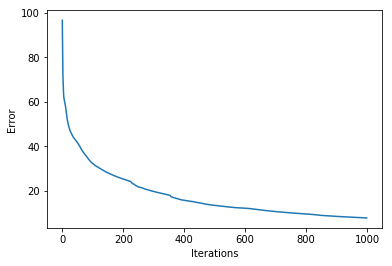

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math as m

data = np.loadtxt('pattern1.txt')
Xn=np.ravel(data)
X = np.array_split(Xn,26)
X=np.array(X)
ynew = []

Y = np.array([list('{0:08b}'.format(x)) for x in range(65,91)], dtype = float)
Y=Y.T

b=0.5

Ni=156; Nh=16; No=8;

#paramteres and array intialisation
Ntrials=1000
wh=np.random.randn(Nh, Ni); dwh=np.zeros(wh.shape)
wo=np.random.randn(No,Nh);  dwo=np.zeros(wo.shape)
error=np.array([])

bo=0.3
bh=0.5

for trials in range(Ntrials):
    h=1/(1+np.exp(-wh@X.T+bo))
    y=1/(1+np.exp(-wo@h+bh))
    do=y*(1-y)*(Y-y)
    dh=(h*(1-h))*(wo.transpose()@do)
    dwo=do@h.T
    wo=wo+0.1*dwo
#    print("X",np.shape(X),"dh",np.shape(dh),"dwh",np.shape(dwh))
    dwh=0.9*dwh+dh@X
    wh=wh+0.1*dwh
    bo=1/26*(np.sum(do))
    bh=1/26*(np.sum(dh))
    error=np.append(error,np.sum(abs(Y-y)))

y=np.round(y.T)

for i in range(0,len(y)):
    str1 = ''.join(str(int(e)) for e in y[i])
    ynew= np.append(ynew,str1)
    print("The ASCII value of", chr(int(ynew[i],2)), "is",int(ynew[i],2))


plt.xlabel("Iterations")
plt.ylabel("Error")
plt.plot(error)
plt.show()

<b>Solution 2 </b>
I used Gaussian blurr to add noise to the input pattern, the standard deviation is directly proportional to the amount of noise added in the input. At standard deviation 2 the image started getting distorted and after using different values for standard deviation to create noise my pattern was completely distorted with standard deviation 7.

The pattern after noise is:
C
C
B
C
A
A
C
B
C
C
B
A
@
B
C
A
C
A
C
@
B
@
@
@
@
@
Mean Accuracy is 5.32544378698 %


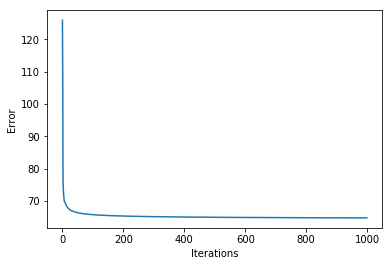

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math as m

data = np.loadtxt('pattern1.txt')
Xn=np.ravel(data)
X = np.array_split(Xn,26)
X=np.array(X)
ynew = []

Y = np.array([list('{0:08b}'.format(x)) for x in range(65,91)], dtype = float)
Y=Y.T
b=0.5

Ni=156; Nh=16; No=8;
Ntrials=1000
wh=np.random.randn(Nh, Ni); dwh=np.zeros(wh.shape)
wo=np.random.randn(No,Nh);  dwo=np.zeros(wo.shape)
error=np.array([])

bo=0.3
bh=0.5


###Adding Gaussian Blurr
mu=0
sig=7

for i in range(0,26):
    for j in range(0,156):
        temp1 = 1/(m.sqrt(2*m.pi)*sig)
        temp2 = np.exp(-np.power((X[i][j] - mu)/sig, 2)/2)
        X[i][j] = temp1*temp2

for trials in range(Ntrials):
    h=1/(1+np.exp(-wh@X.T+bo))
    y=1/(1+np.exp(-wo@h+bh))
    do=y*(1-y)*(Y-y)
    dh=(h*(1-h))*(wo.transpose()@do)
    dwo=do@h.T
    wo=wo+0.1*dwo
    dwh=0.9*dwh+dh@X
    wh=wh+0.01*dwh
    bo=1/26*(np.sum(do))
    bh=1/26*(np.sum(dh))
    error=np.append(error,np.sum(abs(Y-y)))

y=np.round(y.T)

print("The pattern after noise is:")
for i in range(0,len(y)):
    str1 = ''.join(str(int(e)) for e in y[i])
    ynew= np.append(ynew,str1)
    print(chr(int(ynew[i],2)))

Ynew=[]
for i in range(0,len(Y.T)):
    str2 = ''.join(str(int(e)) for e in Y.T[i])
    Ynew= np.append(Ynew,str1)

##ACCURACY
acc = np.zeros(26)
total = 26.0
score = 0

for i in range(26) :
    if(Ynew[i] == ynew[i]):
        score+= 1
    acc[i] = score/total
print('Mean Accuracy is ' +str(np.mean(acc)*100) + ' %')

plt.xlabel("Iterations")
plt.ylabel("Error")
plt.plot(error)
plt.show()

<b>Solution 3 </b>
Because of the distortion in the input the predictions keep changing.

In [91]:
data = np.loadtxt('pattern2.txt')
X=np.ravel(data)
ynew = []
h=1/(1+np.exp(-wh@X.T))
y=1/(1+np.exp(-wo@h))
y=np.round(y.T)
ynew = ''.join(str(int(e)) for e in y)
print("The ASCII value of", chr(int(ynew,2)), "is",int(ynew,2))

The ASCII value of I is 73


<b>Solution 4</b>
I added a little bit noise in the input and then ran the model for different number of hidden nodes and as per the plots for error in the desired and expected values, 16 would be the best fit for the number of hidden nodes in my model. After finding the most accurate value for the number of hidden nodes, I ran the model again with different percentage of noise (by changing the standard deviation) till the point the change in error function is constant.

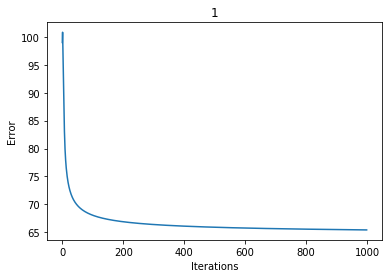

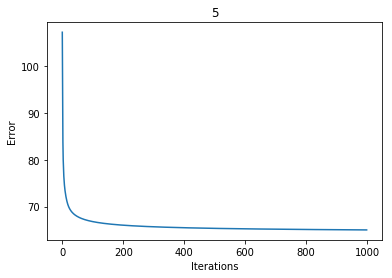

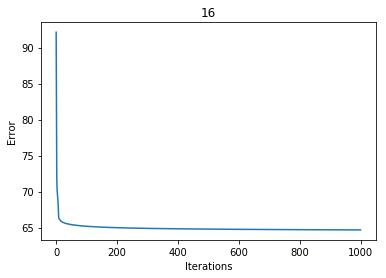

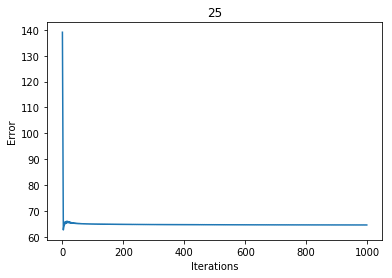

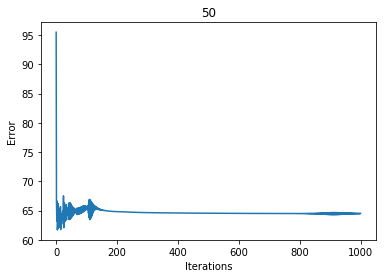

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math as m

data = np.loadtxt('pattern1.txt')
Xn=np.ravel(data)
X = np.array_split(Xn,26)
X=np.array(X)

Y = np.array([list('{0:08b}'.format(x)) for x in range(65,91)], dtype = float)
Y=Y.T

def Noise_HIDDENNODES(Nh):
    Ni=156; No=8;
    Ntrials=1000
    wh=np.random.randn(Nh, Ni); dwh=np.zeros(wh.shape)
    wo=np.random.randn(No,Nh);  dwo=np.zeros(wo.shape)
    error=np.array([])
    bo=0.3
    bh=0.5
    ynew = []
    sig = 2
    
    for i in range(0,26):
        for j in range(0,156):
            temp1 = 1/(m.sqrt(2*m.pi)*sig)
            temp2 = np.exp(-np.power((X[i][j] - mu)/sig, 2)/2)
            X[i][j] = temp1*temp2
    
    for trials in range(Ntrials):
        h=1/(1+np.exp(-wh@X.T+bo))
        y=1/(1+np.exp(-wo@h+bh))
        do=y*(1-y)*(Y-y)
        dh=(h*(1-h))*(wo.transpose()@do)
        dwo=do@h.T
        wo=wo+0.1*dwo
        dwh=0.9*dwh+dh@X
        wh=wh+0.1*dwh
        bo=1/26*(np.sum(do))
        bh=1/26*(np.sum(dh))
        error=np.append(error,np.sum(abs(Y-y)))
    
    y=np.round(y.T)
    
    for i in range(0,len(y)):
        str1 = ''.join(str(int(e)) for e in y[i])
        ynew= np.append(ynew,str1)

    plt.xlabel("Iterations")
    plt.ylabel("Error")
    plt.title("Standard")
    plt.title(Nh)
    plt.plot(error)
    plt.show()

Noise_HIDDENNODES(1)
Noise_HIDDENNODES(5)
Noise_HIDDENNODES(16)
Noise_HIDDENNODES(25)
Noise_HIDDENNODES(50)


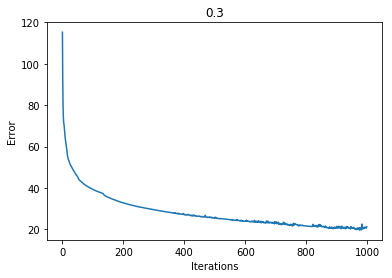

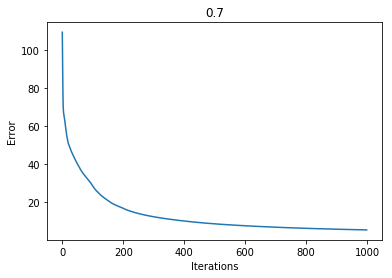

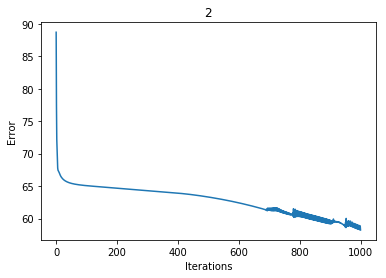

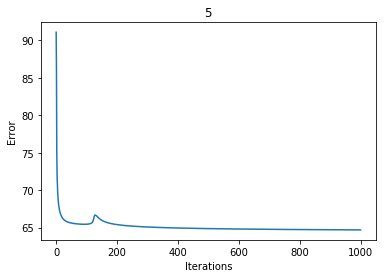

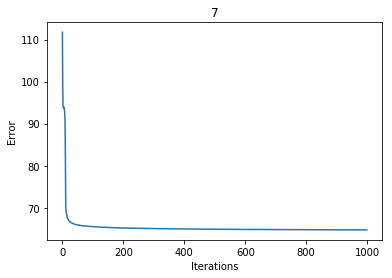

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math as m

data = np.loadtxt('C:\\Users\\shilp\\Desktop\\ML\\Assignment 4\\pattern1.txt')
Xn=np.ravel(data)
X = np.array_split(Xn,26)
X=np.array(X)

Y = np.array([list('{0:08b}'.format(x)) for x in range(65,91)], dtype = float)
Y=Y.T

mu=0
def Noise_STDEV(sig):
    Ni=156; Nh=16; No=8;
    Ntrials=1000
    wh=np.random.randn(Nh, Ni); dwh=np.zeros(wh.shape)
    wo=np.random.randn(No,Nh);  dwo=np.zeros(wo.shape)
    error=np.array([])
    bo=0.3
    bh=0.5
    ynew = []

    for i in range(0,26):
        for j in range(0,156):
            temp1 = 1/(m.sqrt(2*m.pi)*sig)
            temp2 = np.exp(-np.power((X[i][j] - mu)/sig, 2)/2)
            X[i][j] = temp1*temp2
    
    for trials in range(Ntrials):
        h=1/(1+np.exp(-wh@X.T+bo))
        y=1/(1+np.exp(-wo@h+bh))
        do=y*(1-y)*(Y-y)
        dh=(h*(1-h))*(wo.transpose()@do)
        dwo=do@h.T
        wo=wo+0.1*dwo
        dwh=0.9*dwh+dh@X
        wh=wh+0.1*dwh
        bo=1/26*(np.sum(do))
        bh=1/26*(np.sum(dh))
        error=np.append(error,np.sum(abs(Y-y)))
    
    y=np.round(y.T)
    
    for i in range(0,len(y)):
        str1 = ''.join(str(int(e)) for e in y[i])
        ynew= np.append(ynew,str1)

    plt.xlabel("Iterations")
    plt.ylabel("Error")
    plt.title("Standard")
    plt.title(sig)
    plt.plot(error)
    plt.show()

Noise_STDEV(0.3)
Noise_STDEV(0.7)
Noise_STDEV(2)
Noise_STDEV(5)
Noise_STDEV(7)